In [7]:
import torch
import torch.nn as nn
import torchaudio

from audio import get_clean_tensor,get_crunch_tensor,get_distortion_tensor,normalize_tensor
from utilities import plot_waveform

In [8]:
dry = get_clean_tensor()
dry = normalize_tensor(dry)
# plot_waveform(dry)
crunch = get_crunch_tensor()
# plot_waveform(crunch)
distortion = get_distortion_tensor()
# plot_waveform(distortion)

train_time_seconds = 0.04 * 60
val_time_seconds = 0.01 * 60
train_samples = int(44_100 * train_time_seconds)
val_samples = int(44_100 * val_time_seconds)

x = dry[0]
y = crunch[0]

x_train = x[:train_samples]
y_train = y[:train_samples]

x_val = x[train_samples:train_samples+val_samples]
y_val = y[train_samples:train_samples+val_samples]

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

torch.Size([105840])
torch.Size([105840])
torch.Size([26460])
torch.Size([26460])


In [10]:
from train import train
from models import LSTM

In [11]:
model = LSTM(n_hidden=64,n_layers=1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
model = train(model,optimizer,x_train,y_train,x_val,y_val,10,100,200,64,'cpu','temporary','temporary')

epoch: 0


KeyboardInterrupt: 

In [ ]:
import numpy as np

In [ ]:
scores = np.load('scores/test.npy')
for e in range(10):
    print('epoch: %d' % e)
    print("tl: %f" % scores[e][0])
    print("vl: %f" % scores[e][1])
    print("tt: %f" % scores[e][2])
    print("vt: %f" % scores[e][3])
    print()

epoch: 0
tl: 1.615634
vl: 0.987823
tt: 36.771001
vt: 757860.000000

epoch: 1
tl: 0.862003
vl: 0.804918
tt: 33.005001
vt: 526696.700000

epoch: 2
tl: 0.793445
vl: 0.798596
tt: 31.367999
vt: 313174.800000

epoch: 3
tl: 0.787257
vl: 0.795383
tt: 36.444000
vt: 342561.700000

epoch: 4
tl: 0.781179
vl: 0.792015
tt: 32.363998
vt: 424783.000000

epoch: 5
tl: 0.774639
vl: 0.788369
tt: 31.115999
vt: 705003.500000

epoch: 6
tl: 0.767287
vl: 0.784227
tt: 38.987001
vt: 337645.000000

epoch: 7
tl: 0.758522
vl: 0.779210
tt: 38.255111
vt: 420607.800000

epoch: 8
tl: 0.747187
vl: 0.772571
tt: 38.050000
vt: 346279.900000

epoch: 9
tl: 0.730740
vl: 0.762701
tt: 37.263002
vt: 366929.200000



np.float64(13.21137298401054)

In [ ]:
import matplotlib.pyplot as plt

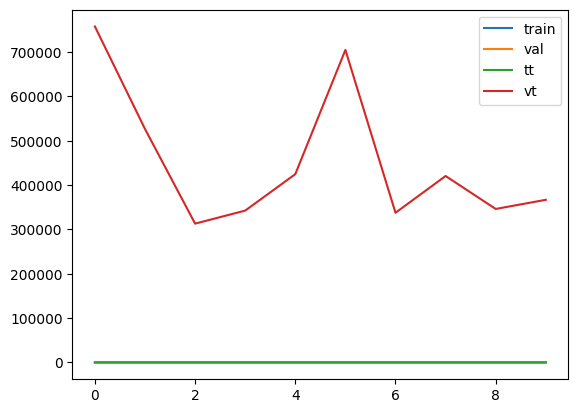

In [ ]:
plt.plot(range(10), scores[:,0],label='train')
plt.plot(range(10), scores[:,1],label='val')
plt.legend()
plt.draw()
plt.pause(0.05)

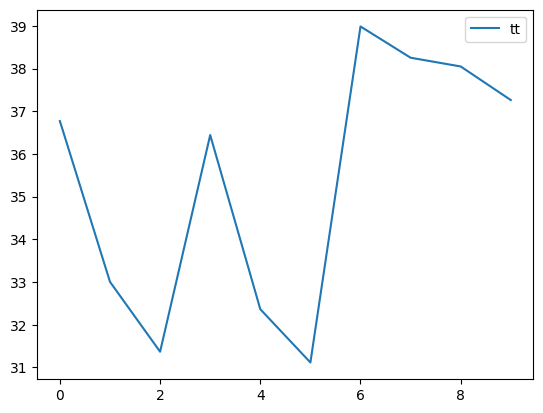

In [ ]:
plt.plot(range(10), scores[:,2],label='tt')
plt.legend()
plt.draw()
plt.pause(0.05)

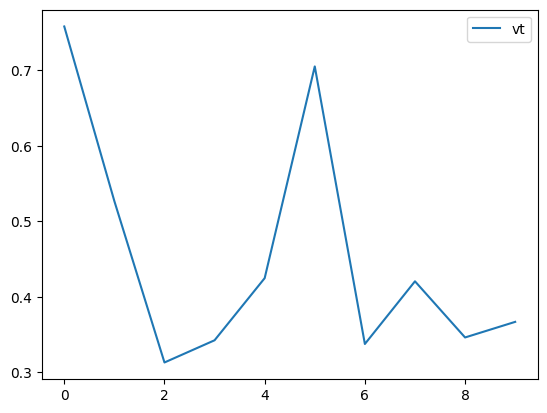

In [ ]:
plt.plot(range(10), scores[:,3]/1000000,label='vt')
plt.legend()
plt.draw()
plt.pause(0.05)